In [1]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # I use a Mac

import numpy as np
import matplotlib.pyplot as plt
import fishchips.experiments_change as experiments
import fishchips.util
from fishchips.plots import plot_ell


In [2]:
# for LCDM
fiducial_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_cl_lensed.dat")[:,:]
ell = np.array([42.0, 122.0, 202.0, 282.0, 362.0, 442.0, 522.0, 602.0, 682.0, 762.0 ,842.0 ,922.0 ,1002.0 ,1082.0 ,1162.0 ,1242.0 ,1322.0 ,1402.0 ,1482.0 ,1562.0 ,1642.0 ,1722.0 ,1802.0 ,1882.0 ,1962.0 ,2042.0 ,2122.0 ,2202.0 ,2282.0 ,2362.0 ,2442.0 ,2522.0 ,2602.0 ,2682.0 , 2762.0, 2842.0, 2922.0]) 
nlkk = np.array([1.02886566516913e-08,1.1194860550459957e-08,1.2505619136465732e-08,1.3639000292859354e-08,1.4726157985091727e-08,1.5725847204661933e-08,1.6938661270395064e-08,1.8682705809355073e-08,2.112299958392952e-08,2.3537204158565772e-08,2.6496287215049565e-08,3.025903245034381e-08,3.4250486637297883e-08,3.858609285601067e-08,4.3227517165236133e-08,4.881779318529917e-08,5.4637529106849264e-08,6.091794461679896e-08,6.748938330785925e-08,7.478835883220224e-08,8.228241718672807e-08,8.893682840859781e-08,9.60522674909952e-08,1.0384832218496256e-07,1.1192068433016309e-07,1.199852307972035e-07,1.3053890509577023e-07,1.43859054270254e-07,1.5863511614121002e-07,1.7420892487626716e-07,1.9100543065917838e-07,2.102343953615504e-07,2.2934157407025104e-07,2.4737779899712124e-07,2.6884587664392953e-07,2.918082225405003e-07,3.080468562881667e-07])
ellK = np.linspace(2, 2500, 2501)
nlK = np.interp(ellK, ell, nlkk)
    
noise_K = np.zeros(2499, 'float64')
for l in range(2, 2501):
    noise_K[l-2] = nlK[l-2]

n_bin = 50
f_sky = 1.0
sigma_Cl_sq = ((fiducial_data[:,5]*(fiducial_data[:,0]+1)*fiducial_data[:,0])**2 + noise_K**2)*2/\
               (2*fiducial_data[:,0]+1)/n_bin/f_sky

No handles with labels found to put in legend.


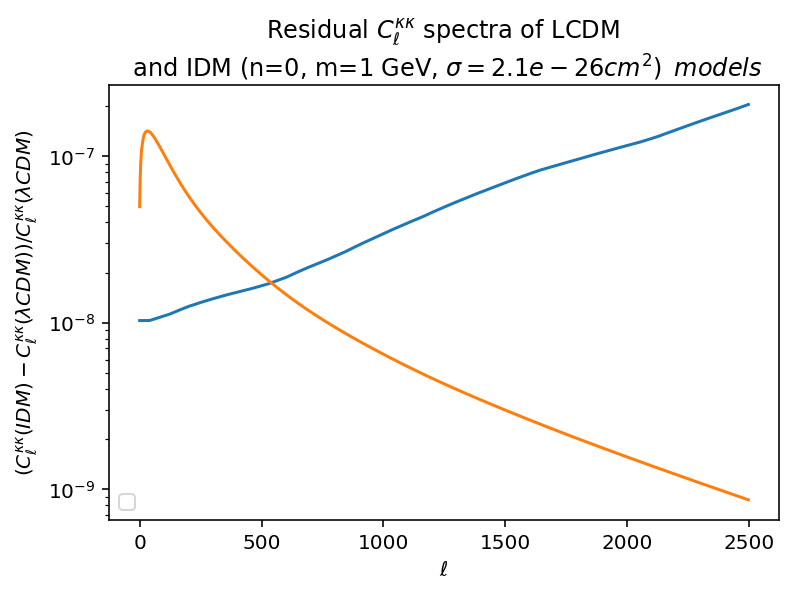

In [3]:
plt.figure()
plt.xscale('linear');plt.yscale('log');#plt.xlim(0, 2500); #plt.ylim(1.e-2, 1.e5)
plt.xlabel(r'${\ell}$')
plt.ylabel(r'$(C_{\ell}^{\kappa\kappa}(IDM) - C_{\ell}^{\kappa\kappa}({\lambda}CDM))/C_{\ell}^{\kappa\kappa}({\lambda}CDM) $')

#plt.plot(ll_dmeff_0_pt, (clPP_dmeff_0_pt - clPP_lcdm_pt)/clPP_lcdm_pt,'r--', label = 'n = 0, Nonlinear PT')
#plt.plot(ll_dmeff_2_pt, (clPP_dmeff_2_pt - clPP_lcdm_pt)/clPP_lcdm_pt,'b--', label = 'n = 2, Nonlinear PT')
#plt.plot(ll_dmeff__2_pt, (clPP_dmeff__2_pt - clPP_lcdm_pt)/clPP_lcdm_pt,'m--', label = 'n = -2, Nonlinear PT')
plt.plot(noise_K)
plt.plot(fiducial_data[:,5]*(fiducial_data[:,0]+1)*fiducial_data[:,0])
plt.legend(loc = "lower left")
plt.title("Residual " + r'$C_{\ell} ^{\kappa\kappa}$'+ " spectra of LCDM \n " + 'and IDM (n=0, m=1 GeV, ' +r'${\sigma}=2.1e-26 cm^2)\,\ models$')
plt.show()

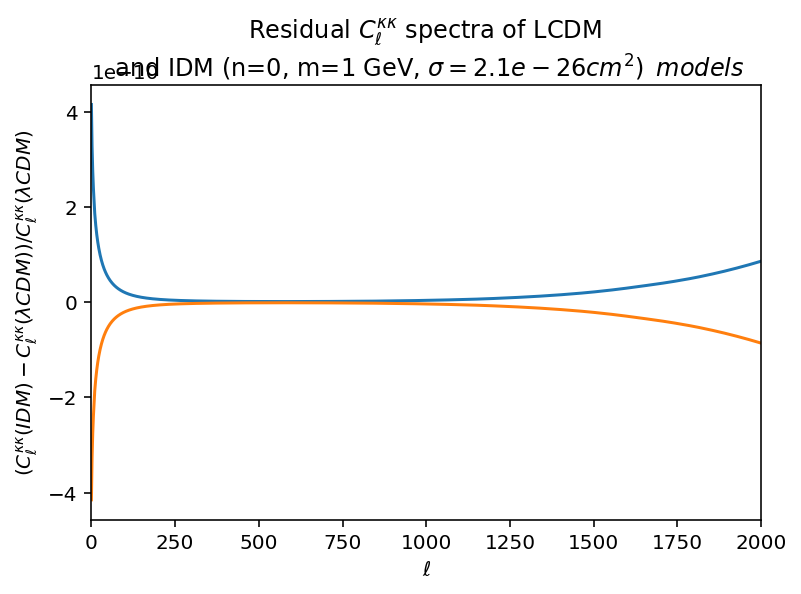

In [4]:
plt.figure()
plt.xscale('linear');plt.yscale('linear');plt.xlim(0, 2000); #plt.ylim(-2, 2)
plt.xlabel(r'${\ell}$')
plt.ylabel(r'$(C_{\ell}^{\kappa\kappa}(IDM) - C_{\ell}^{\kappa\kappa}({\lambda}CDM))/C_{\ell}^{\kappa\kappa}({\lambda}CDM) $')

#plt.plot(ll_dmeff_0_pt, (clPP_dmeff_0_pt - clPP_lcdm_pt)/clPP_lcdm_pt,'r--', label = 'n = 0, Nonlinear PT')
#plt.plot(ll_dmeff_2_pt, (clPP_dmeff_2_pt - clPP_lcdm_pt)/clPP_lcdm_pt,'b--', label = 'n = 2, Nonlinear PT')
#plt.plot(ll_dmeff__2_pt, (clPP_dmeff__2_pt - clPP_lcdm_pt)/clPP_lcdm_pt,'m--', label = 'n = -2, Nonlinear PT')
plt.plot((sigma_Cl_sq)/(fiducial_data[:,5]*(fiducial_data[:,0]+1)*fiducial_data[:,0]))
plt.plot((-1)*(sigma_Cl_sq)/(fiducial_data[:,5]*(fiducial_data[:,0]+1)*fiducial_data[:,0]))
plt.title("Residual " + r'$C_{\ell} ^{\kappa\kappa}$'+ " spectra of LCDM \n " + 'and IDM (n=0, m=1 GeV, ' +r'${\sigma}=2.1e-26 cm^2)\,\ models$')
plt.show()

In [5]:
# Get all data points for all parameters
# from output .dat files

# after "=" write path to the .dat file with Pk data (..._pk) or Cl data (..._cl)
# Output files (from .ini files above) I used are in PT-check/class/test_output/
# for example, lcdm_pk = "/Users/aizhan.akh/Documents/Projects/PT-check/class/test_output/lcdm_pk.dat"

# for LCDM
fiducial_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_cl_lensed.dat")[:,:]

# for dmeff
dmeff_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_dmeffcl_lensed.dat")[:,:]

#for omega_b              
omega_b_l_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_l_omega_b_cl_lensed.dat")[:,:]
omega_b_r_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_r_omega_b_cl_lensed.dat")[:,:]

#for omega_cdm             
omega_cdm_l_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_l_omega_cdm_cl_lensed.dat")[:,:] 
omega_cdm_r_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_r_omega_cdm_cl_lensed.dat")[:,:] 

#for tau              
tau_l_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_l_tau_cl_lensed.dat")[:,:] 
tau_r_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_r_tau_cl_lensed.dat")[:,:]

#for h             
h_l_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_l_h_cl_lensed.dat")[:,:] 
h_r_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_r_h_cl_lensed.dat")[:,:]

#for As              
As_l_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_l_As_cl_lensed.dat")[:,:] 
As_r_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_r_As_cl_lensed.dat")[:,:]

#for ns              
ns_l_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_l_ns_cl_lensed.dat")[:,:] 
ns_r_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_r_ns_cl_lensed.dat")[:,:]

In [6]:
# Get all data points for all parameters
# from output .dat files

# after "=" write path to the .dat file with Pk data (..._pk) or Cl data (..._cl)
# Output files (from .ini files above) I used are in PT-check/class/test_output/
# for example, lcdm_pk = "/Users/aizhan.akh/Documents/Projects/PT-check/class/test_output/lcdm_pk.dat"

# for LCDM
fiducial_data_linear = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/linear/lcdm_pt_linear_cl_lensed.dat")[:,:]

# for dmeff
dmeff_data_linear = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/linear/lcdm_pt_dmeff_linear_cl_lensed.dat")[:,:]

#for omega_b              
omega_b_l_data_linear = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/linear/lcdm_pt_l_omega_b_linear_cl_lensed.dat")[:,:]
omega_b_r_data_linear = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/linear/lcdm_pt_r_omega_b_linear_cl_lensed.dat")[:,:]

#for omega_cdm             
omega_cdm_l_data_linear = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/linear/lcdm_pt_l_omega_cdm_linear_cl_lensed.dat")[:,:] 
omega_cdm_r_data_linear = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/linear/lcdm_pt_r_omega_cdm_linear_cl_lensed.dat")[:,:] 

#for tau              
tau_l_data_linear = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/linear/lcdm_pt_l_tau_linear_cl_lensed.dat")[:,:] 
tau_r_data_linear = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/linear/lcdm_pt_r_tau_linear_cl_lensed.dat")[:,:]

#for h             
h_l_data_linear = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/linear/lcdm_pt_l_h_linear_cl_lensed.dat")[:,:] 
h_r_data_linear = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/linear/lcdm_pt_r_h_linear_cl_lensed.dat")[:,:]

#for As              
As_l_data_linear = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/linear/lcdm_pt_l_As_linear_cl_lensed.dat")[:,:] 
As_r_data_linear = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/linear/lcdm_pt_r_As_linear_cl_lensed.dat")[:,:]

#for ns              
ns_l_data_linear = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/linear/lcdm_pt_l_ns_linear_cl_lensed.dat")[:,:] 
ns_r_data_linear = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/linear/lcdm_pt_r_ns_linear_cl_lensed.dat")[:,:]

In [7]:
pars = np.array( ['omega_b', 'omega_cdm', 'h',  'A_s', 'n_s', 'tau_reio', 'sigma_dmeff'])
centers = np.array([0.02230,  0.1188,  0.6774,  2.142e-9, 0.9619, 0.066, 0.0])
steps = np.array([0.0002230,  0.001188,  0.006774,  2.142e-11, 0.009619, 0.00066, 2.1e-26])

In [8]:
fiducial = {}
dmeff = {}       
omega_b_l = {}
omega_b_r = {} 
omega_cdm_l = {} 
omega_cdm_r = {}             
tau_l = {}
tau_r = {}           
h_l = {}
h_r = {}            
As_l = {}
As_r = {} 
ns_l = {}
ns_r = {}

channels = ['ell', 'tt', 'ee', 'te', 'bb', 'pp', 'tp', 'ep']
for i in channels:
    j = channels.index(i)
    fiducial[i] = fiducial_data[:, j]
    dmeff[i] = dmeff_data[:, j]       
        
    omega_b_l[i] = omega_b_l_data[:, j] 
    omega_b_r[i] = omega_b_r_data[:, j] 
        
    omega_cdm_l[i] = omega_cdm_l_data[:, j]  
    omega_cdm_r[i] = omega_cdm_r_data[:, j]              
        
    tau_l[i] = tau_l_data[:, j]
    tau_r[i] = tau_r_data[:, j]             
        
    h_l[i] = h_l_data[:, j] 
    h_r[i] = h_r_data[:, j]             
        
    As_l[i] = As_l_data[:, j] 
    As_r[i] = As_r_data[:, j]
        
    ns_l[i] = ns_l_data[:, j] 
    ns_r[i] = ns_r_data[:, j]
        
        

In [9]:
cl_left = []
cl_right = []

cl_left.append(omega_b_l)
cl_left.append(omega_cdm_l)
cl_left.append(h_l)
cl_left.append(As_l)
cl_left.append(ns_l)
cl_left.append(tau_l)
cl_left.append(fiducial)

cl_right.append(omega_b_r)
cl_right.append(omega_cdm_r)
cl_right.append(h_r)
cl_right.append(As_r)
cl_right.append(ns_r)
cl_right.append(tau_r)
cl_right.append(dmeff)

#cl_right[1]['tt']

In [10]:
example = experiments.CMB_Primary()
fisher = example.get_fisher_changed(fiducial, pars, cl_right, cl_left, steps)
cov = np.linalg.inv(fisher)

generating new axis
['$\\mathrm{omega\\_b}$', '$\\mathrm{omega\\_cdm}$', '$\\mathrm{h}$', '$\\mathrm{A\\_s}$', '$\\mathrm{n\\_s}$', '$\\mathrm{tau\\_reio}$', '$\\mathrm{sigma\\_dmeff}$']


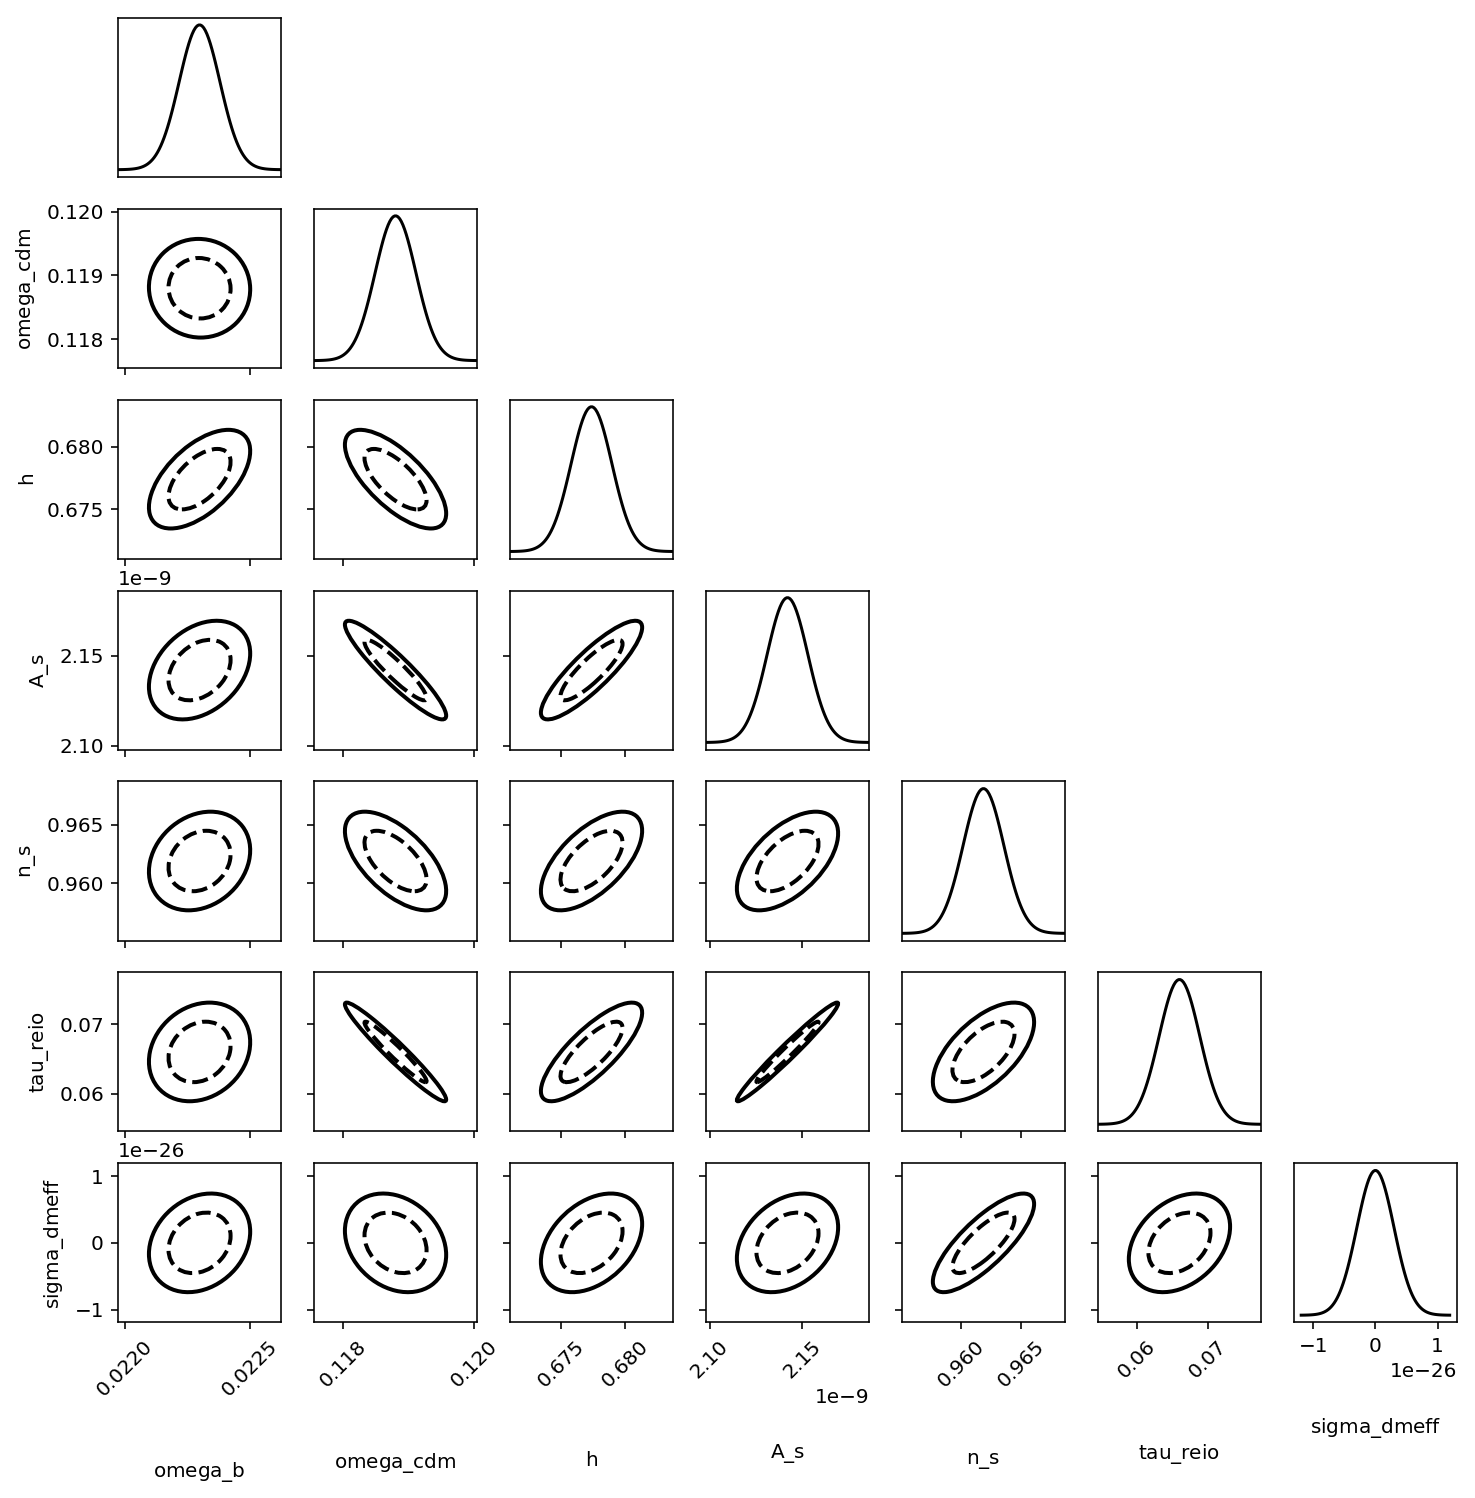

In [11]:
plot_ell(pars, centers, cov)

In [12]:
example_Planck = experiments.get_PlanckPol_combine()
fisher = example_Planck[0].get_fisher_changed(fiducial, pars, cl_right, cl_left, steps)+example_Planck[1].get_fisher_changed(fiducial, pars, cl_right, cl_left, steps)+example_Planck[2].get_fisher_changed(fiducial, pars, cl_right, cl_left, steps)
cov = np.linalg.inv(fisher)

generating new axis
['$\\mathrm{omega\\_b}$', '$\\mathrm{omega\\_cdm}$', '$\\mathrm{h}$', '$\\mathrm{A\\_s}$', '$\\mathrm{n\\_s}$', '$\\mathrm{tau\\_reio}$', '$\\mathrm{sigma\\_dmeff}$']


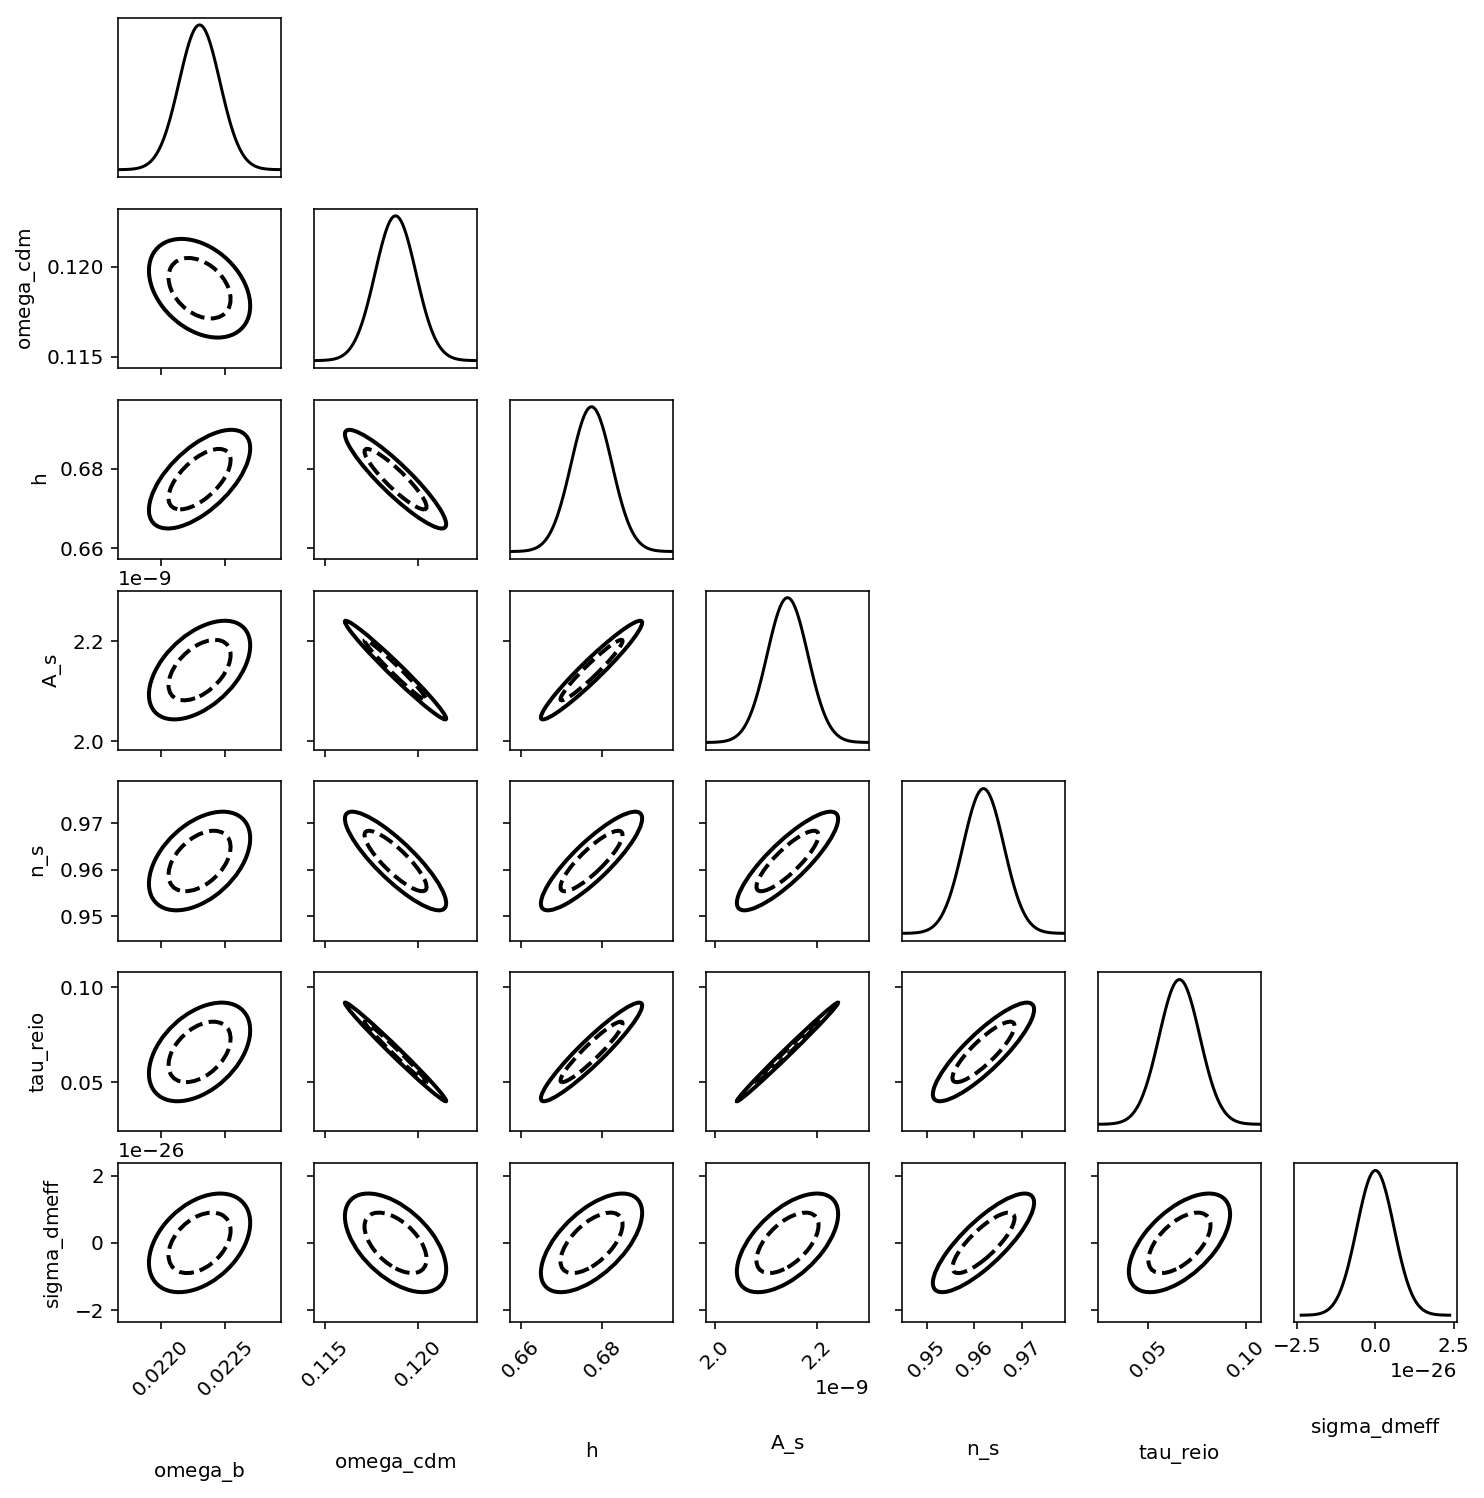

In [13]:
# plot Fisher Forecasts for Planck data
plot_ell(pars, centers, cov)

In [14]:
import fishchips.corner as corner

def unitize_cov(imp_cov, scales):
    imp_cov = imp_cov.copy()
    npar = imp_cov.shape[0]
    for i in range(npar):
        for j in range(npar):
            imp_cov[i,j] *= scales[i] * scales[j]
    return imp_cov

def get_samps(inp_cov, inp_means, num=int(1e8)):
    """
    Generate samples from a covariance matrix and input means.
    
    Parameters
    ----------
        inp_cov (2D numpy array) : covariance matrix from Fisher
        inp_means (1D numpy array) : mean values (mu), fiducial from Fisher
        
    Returns
    -------
        2D numpy array with each row corresponding to one random draw 
        from the multivariate Gaussian
    """
    samps = np.random.multivariate_normal( np.array(inp_means)/np.sqrt(np.diag(inp_cov)), 
                                           unitize_cov(inp_cov,1./np.sqrt(np.diag(inp_cov))), int(1e7))
    samps = samps[samps.T[-1]>0]
    for i in range(inp_cov.shape[0]):
        samps.T[i] *= np.sqrt(inp_cov[i,i])
        
    return samps

In [15]:
unmodified_samples = get_samps(cov, centers)


In [16]:
ar = np.array([[0, 1, 2],[0, 1, 2]])
ar.T[-1]

array([2, 2])

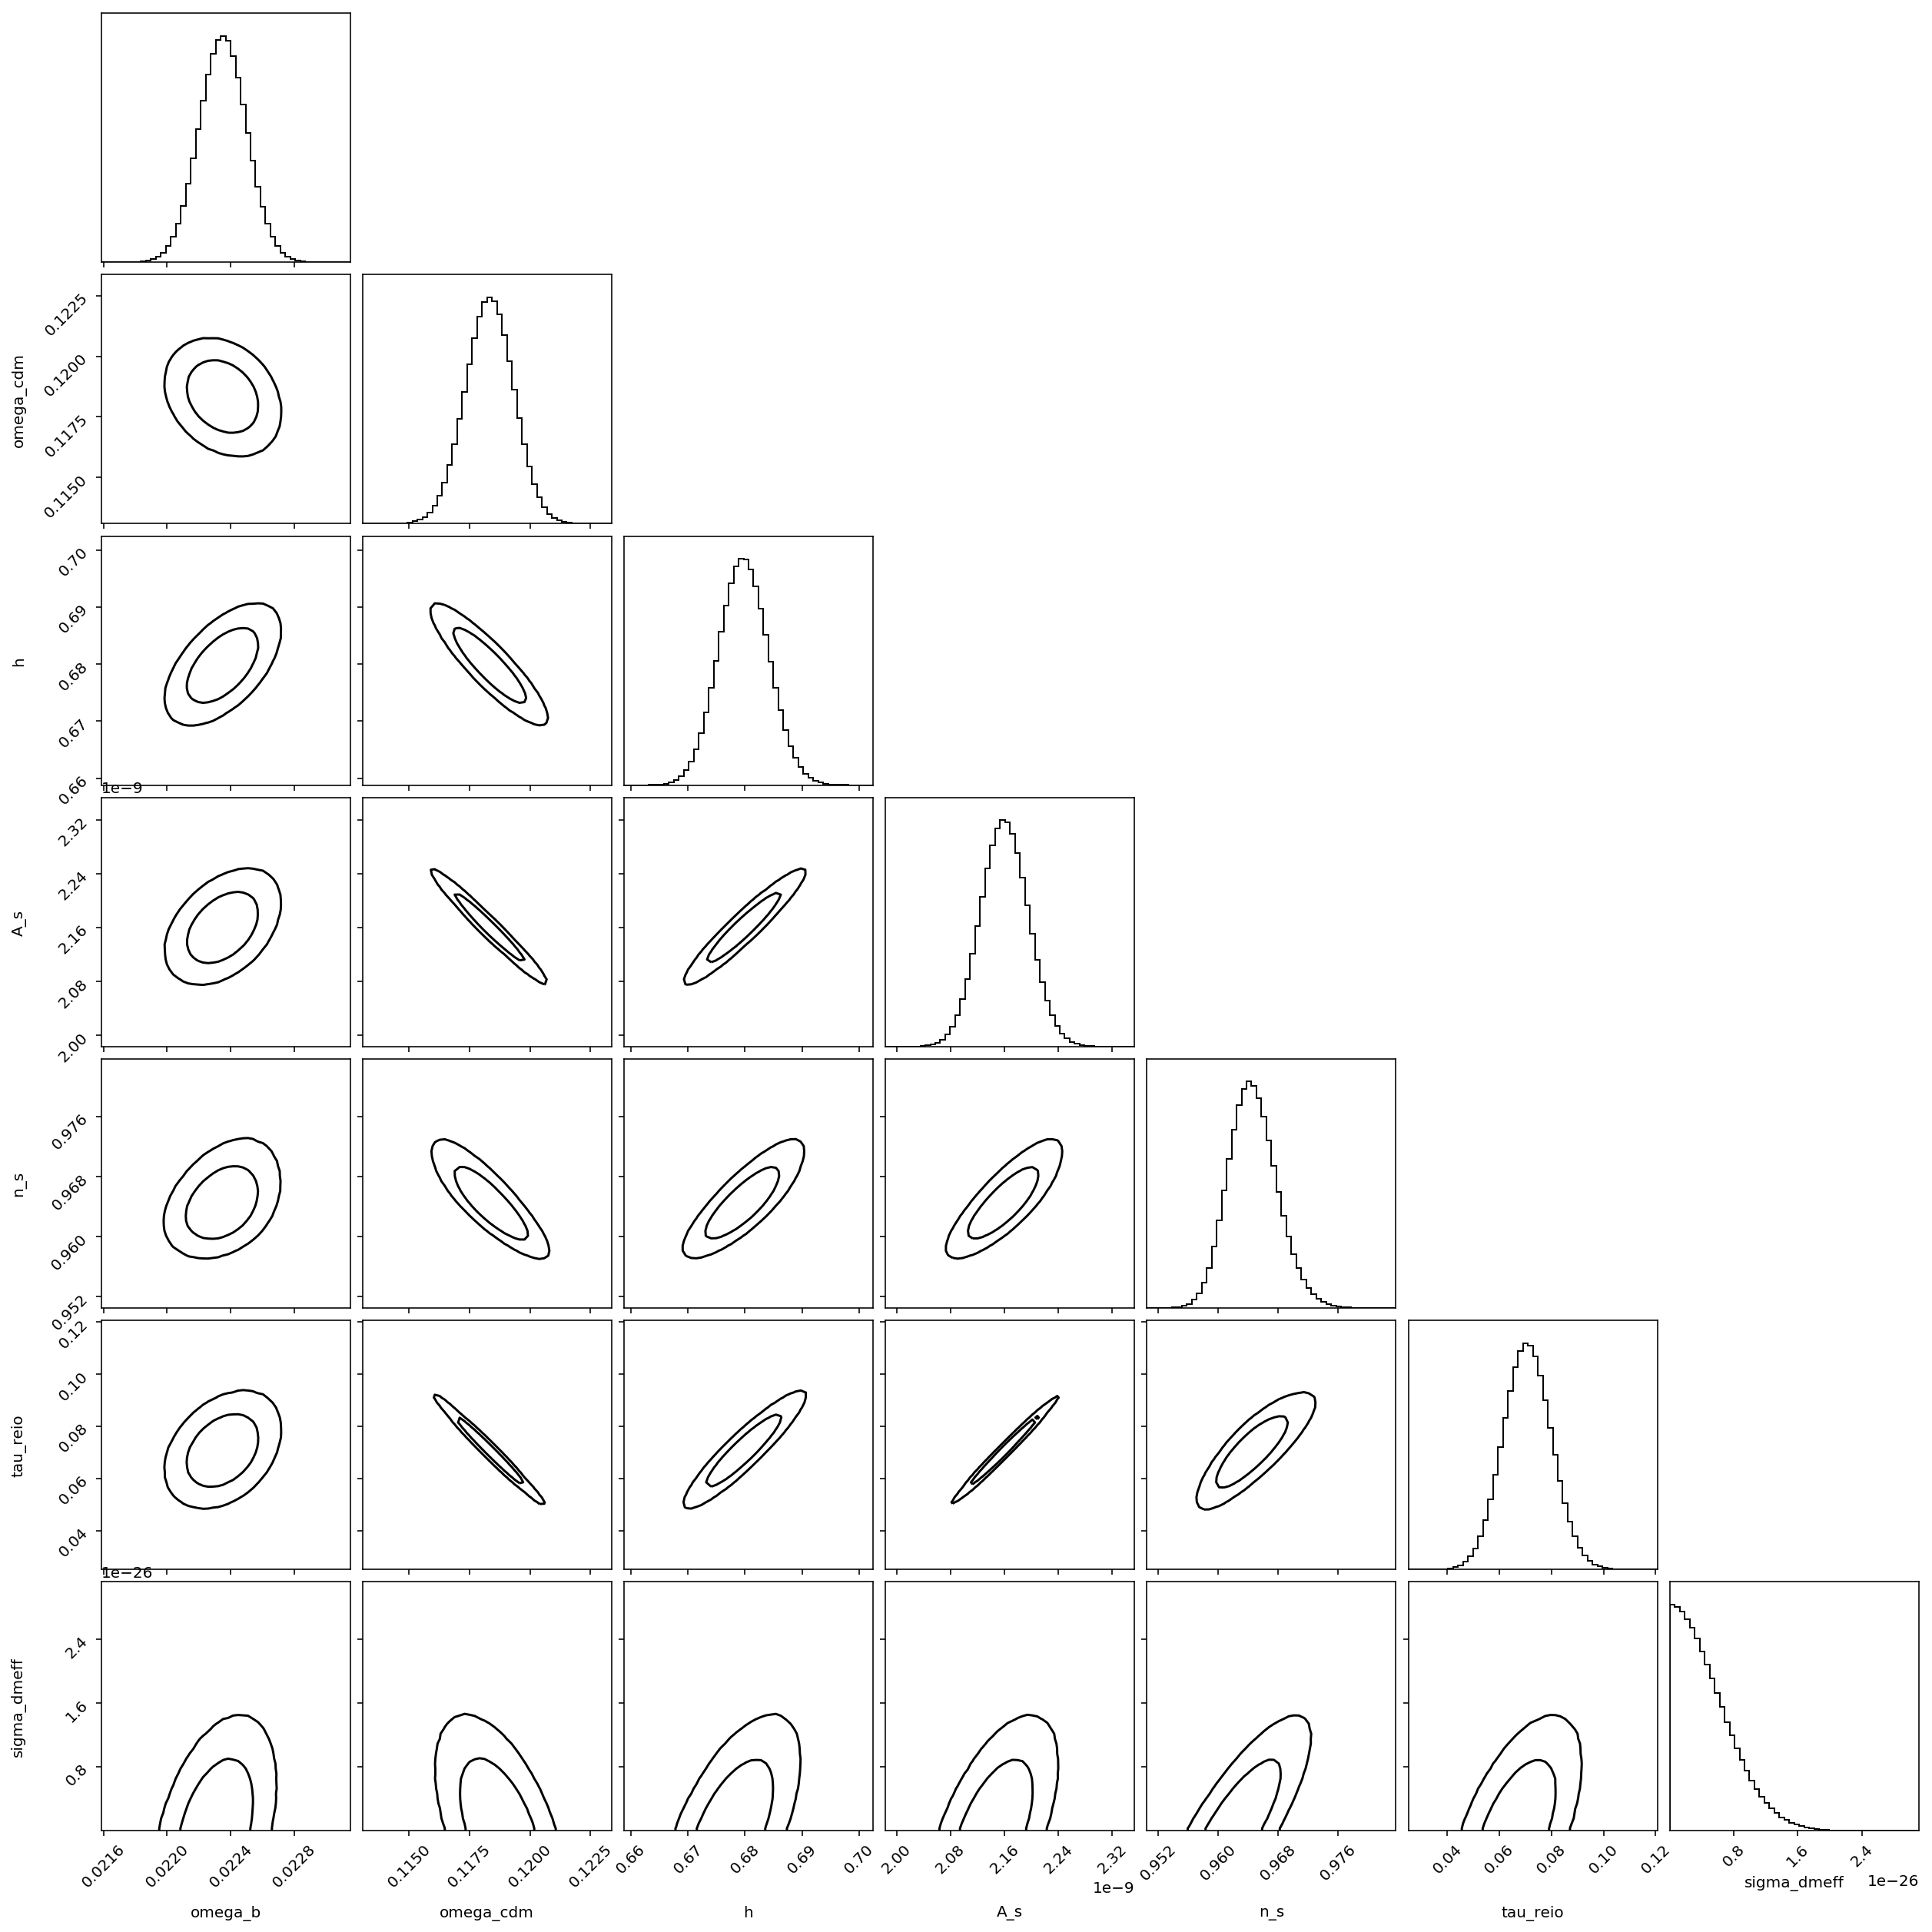

In [17]:
npar = cov.shape[0]
fig, ax = plt.subplots(npar, npar, figsize=(18,18))

corner.corner(unmodified_samples,
              plot_datapoints=False, plot_density=False, bins=50, 
              levels=(0.68,0.95), lw=2, fig=fig,
              hist_kwargs={'density':True}, labels=[r'omega_b', r'omega_cdm', r'h',  r'A_s', r'n_s', r'tau_reio', r'sigma_dmeff']);

In [18]:
def convert_to_cc_array(sig, mass_X):
    """utility function for converting sigma_p to the coupling constant
    
    Parameters
    ----------
        sig (float) : the cross section, sigma_p, possibly a numpy 
        mass_X (float) : dark matter particle mass in GeV
        
    Returns
    -------
        Numpy array that 
    """
    mp = 0.9382720813
    GeV = 1./(0.19732705e-15)
    cc_conversion = (1./( (246.22 * GeV)**4 * np.pi)) * \
        ( (mass_X * mp) / (mass_X + mp) * GeV )**2
    #cc_conversion = (1./( (246.22 * GeV)**4 * np.pi)) * \
        #( (mass_X * mp) / (mass_X + mp) * GeV )**2
    derived_cc = np.sqrt( sig * 1.e-4 / cc_conversion )
    return derived_cc


def get_95_exclusion(input_cov):
    """convenience function for turning a covariance matrix into a 95% exclusion.
    
    This function is specifically for the sigma_p case with a flat prior on the
    coupling, and positive definite cross section.
    
    Parameters
    ----------
        input_cov (numpy array) : covariance matrix
        
    Returns
    -------
        float, 95% upper limit for a fidcuial centered on zero
    """
    # NOTE: sigma_p MUST BE THE LAST VARIABLE
    samps = get_samps(input_cov, forecast_means_list, num=int(1e8))
    samps = samps[samps.T[-1]>0]
    onesig, twosig = corner.quantile(samps[:,-1], 
                                 [0.68,0.95], 
                                 weights=1./np.sqrt(samps.T[-1]))
    return twosig
    

/usr/licensed/anaconda3/5.2.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


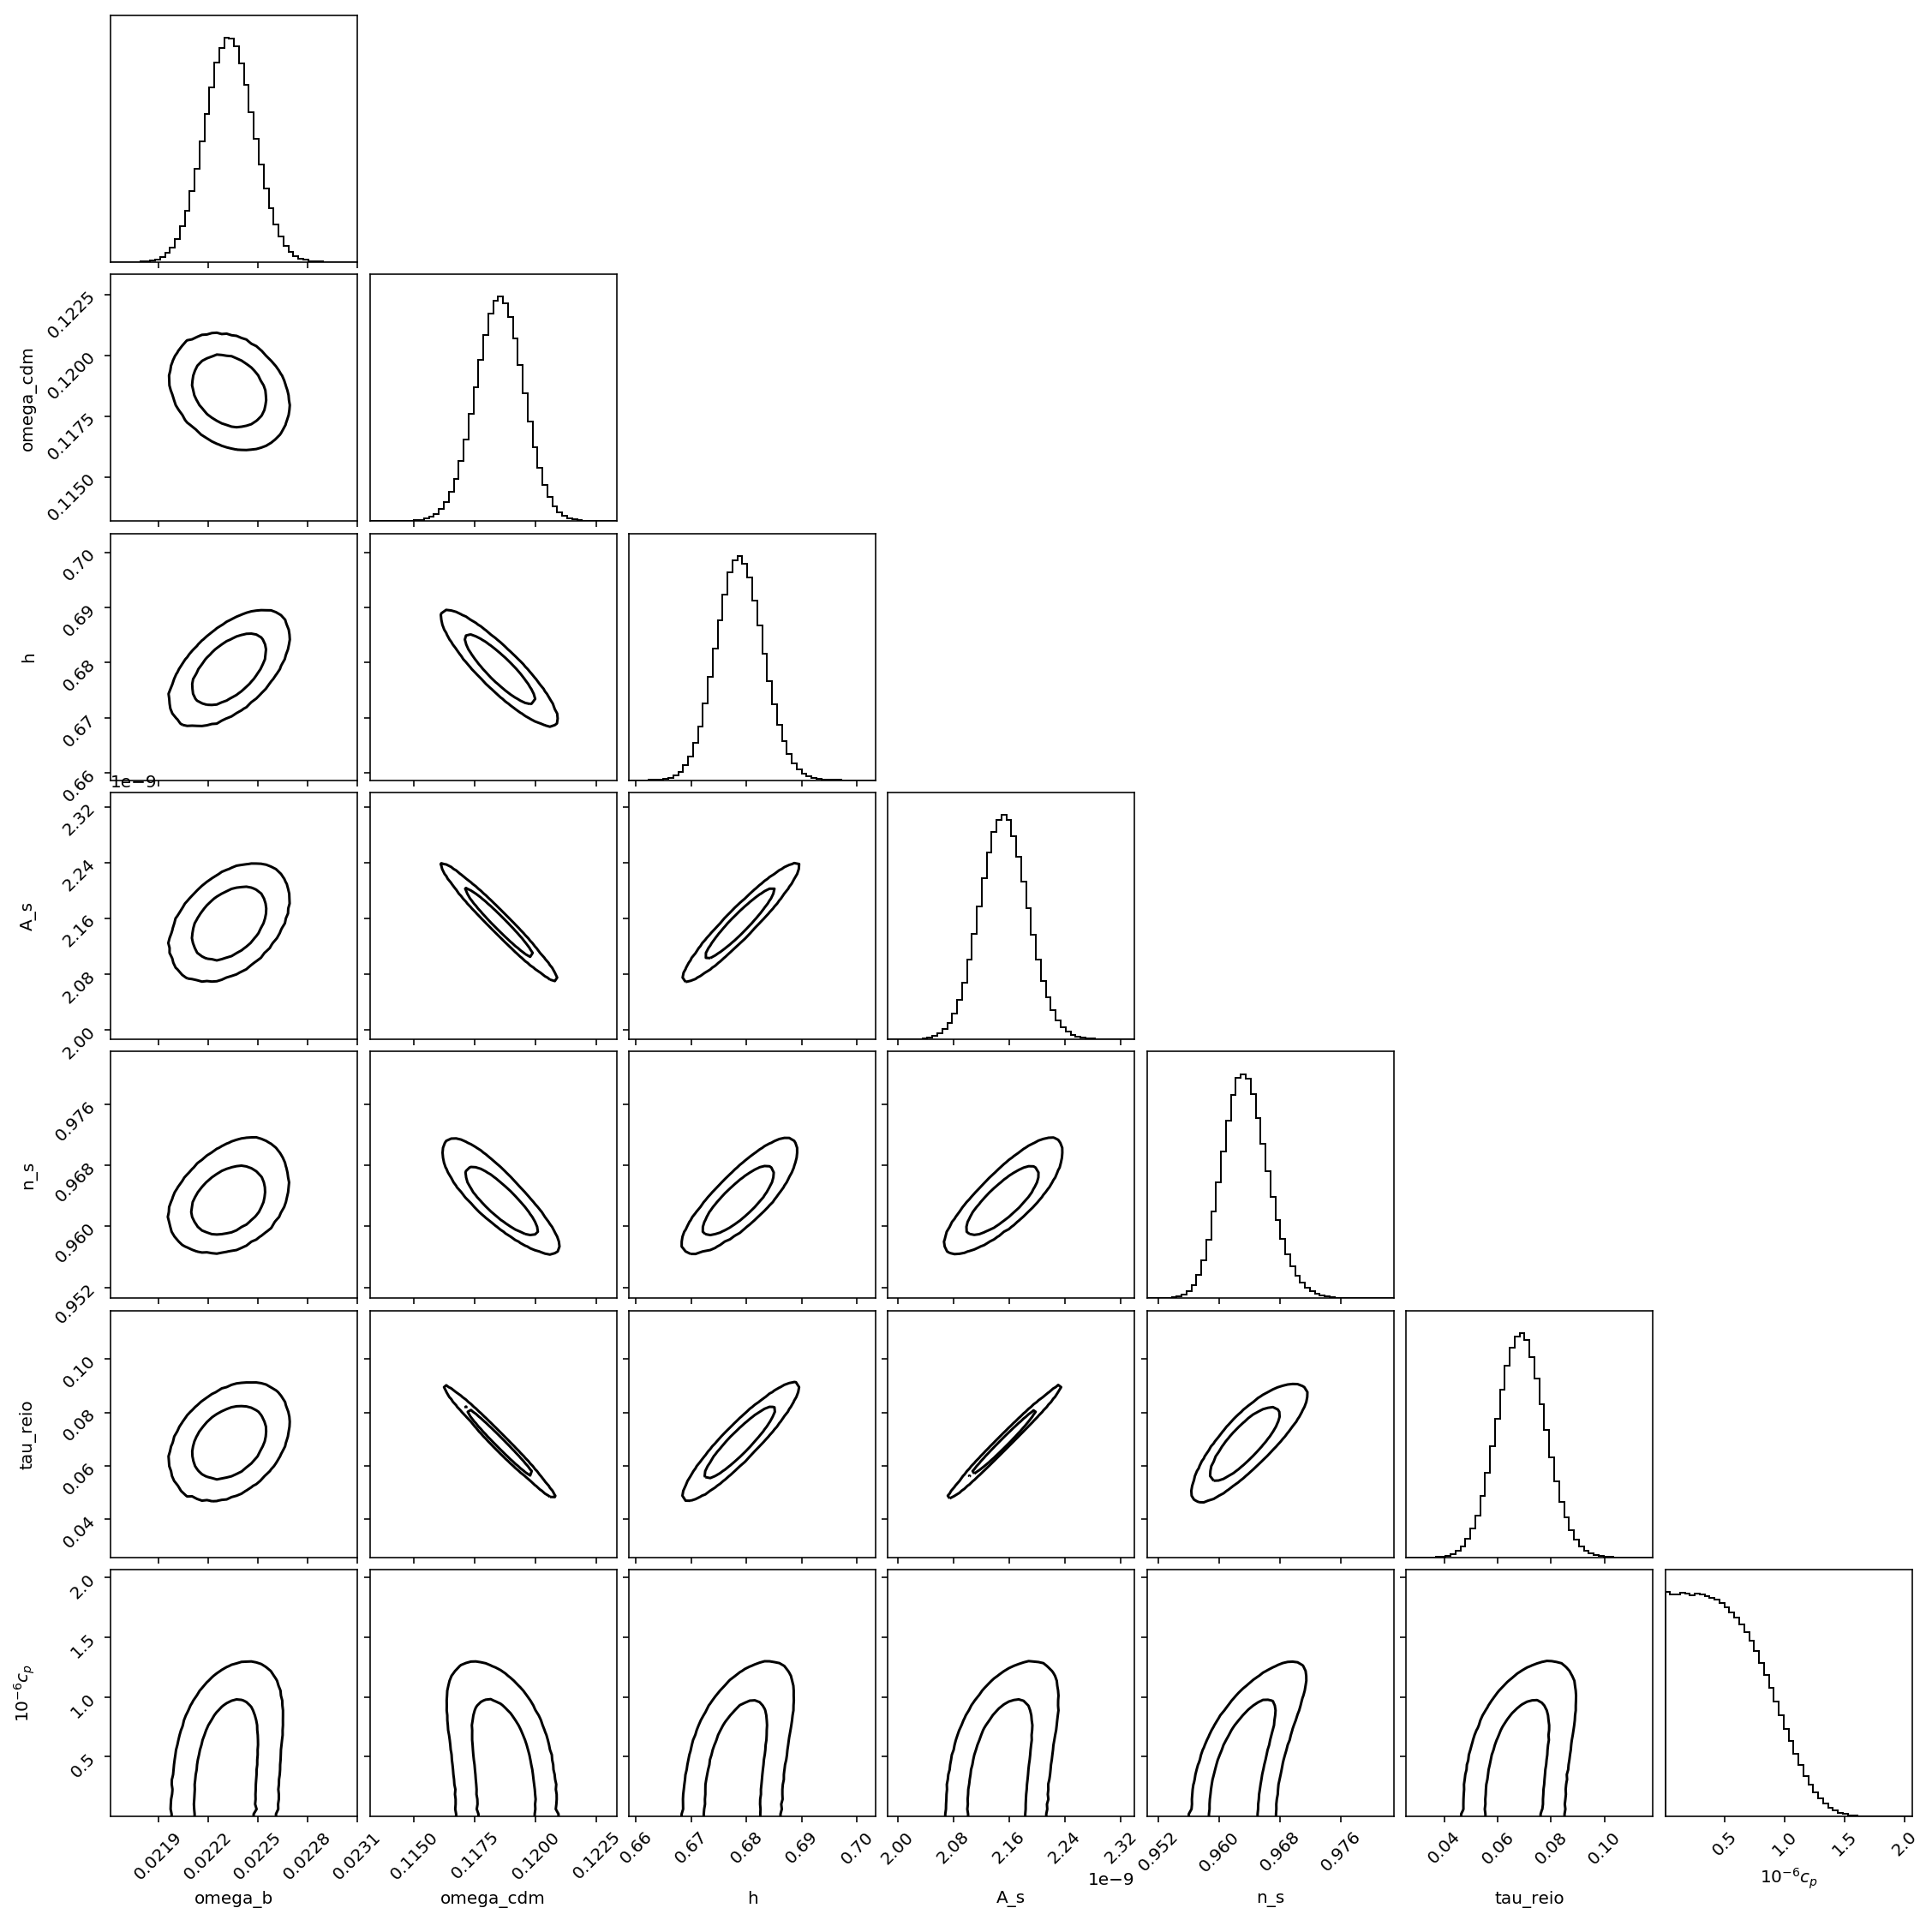

In [19]:
samps = get_samps(cov, centers, num=int(1e8)) # get the samples from the covariance
samps = samps[samps.T[-1]>0] # sigma_p cannot be negative
modified = samps.copy()
modified.T[-1] = convert_to_cc_array(modified.T[-1], 1.0) * 1e-6 # convert to 1e6 * cc
    

corner.corner(modified,
              plot_datapoints=False, plot_density=False, bins=50,  
              weights=1./np.sqrt(samps.T[-1]),
              levels=(0.68,0.95),lw=2, color='black', labels=[r'omega_b', r'omega_cdm', r'h',  r'A_s', r'n_s', r'tau_reio', r'$10^{-6}c_{p}$'], 
              hist_kwargs={'normed':True});

In [20]:
fiducial_linear = {}
dmeff_linear = {}       
omega_b_l_linear = {}
omega_b_r_linear = {} 
omega_cdm_l_linear = {} 
omega_cdm_r_linear = {}             
tau_l_linear = {}
tau_r_linear = {}           
h_l_linear = {}
h_r_linear = {}            
As_l_linear = {}
As_r_linear = {} 
ns_l_linear = {}
ns_r_linear = {}

channels = ['ell', 'tt', 'ee', 'te', 'bb', 'pp', 'tp', 'ep']
for i in channels:
    j = channels.index(i)
    fiducial_linear[i] = fiducial_data_linear[:, j]
    dmeff_linear[i] = dmeff_data_linear[:, j]       
        
    omega_b_l_linear[i] = omega_b_l_data_linear[:, j] 
    omega_b_r_linear[i] = omega_b_r_data_linear[:, j] 
        
    omega_cdm_l_linear[i] = omega_cdm_l_data_linear[:, j]  
    omega_cdm_r_linear[i] = omega_cdm_r_data_linear[:, j]              
        
    tau_l_linear[i] = tau_l_data_linear[:, j]
    tau_r_linear[i] = tau_r_data_linear[:, j]             
        
    h_l_linear[i] = h_l_data_linear[:, j] 
    h_r_linear[i] = h_r_data_linear[:, j]             
        
    As_l_linear[i] = As_l_data_linear[:, j] 
    As_r_linear[i] = As_r_data_linear[:, j]
        
    ns_l_linear[i] = ns_l_data_linear[:, j] 
    ns_r_linear[i] = ns_r_data_linear[:, j]
        
        

In [21]:
cl_left_linear = []
cl_right_linear = []

cl_left_linear.append(omega_b_l)
cl_left_linear.append(omega_cdm_l)
cl_left_linear.append(h_l)
cl_left_linear.append(As_l)
cl_left_linear.append(ns_l)
cl_left_linear.append(tau_l)
cl_left_linear.append(fiducial)

cl_right_linear.append(omega_b_r)
cl_right_linear.append(omega_cdm_r)
cl_right_linear.append(h_r)
cl_right_linear.append(As_r)
cl_right_linear.append(ns_r)
cl_right_linear.append(tau_r)
cl_right_linear.append(dmeff)

#cl_right[1]['tt']

In [22]:
linear = experiments.CMB_Primary()
fisher_linear = linear.get_fisher_changed(fiducial_linear, pars, cl_right_linear, cl_left_linear, steps)
cov_linear = np.linalg.inv(fisher_linear)
unmodified_samples_linear = get_samps(cov_linear, centers)

/usr/licensed/anaconda3/5.2.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


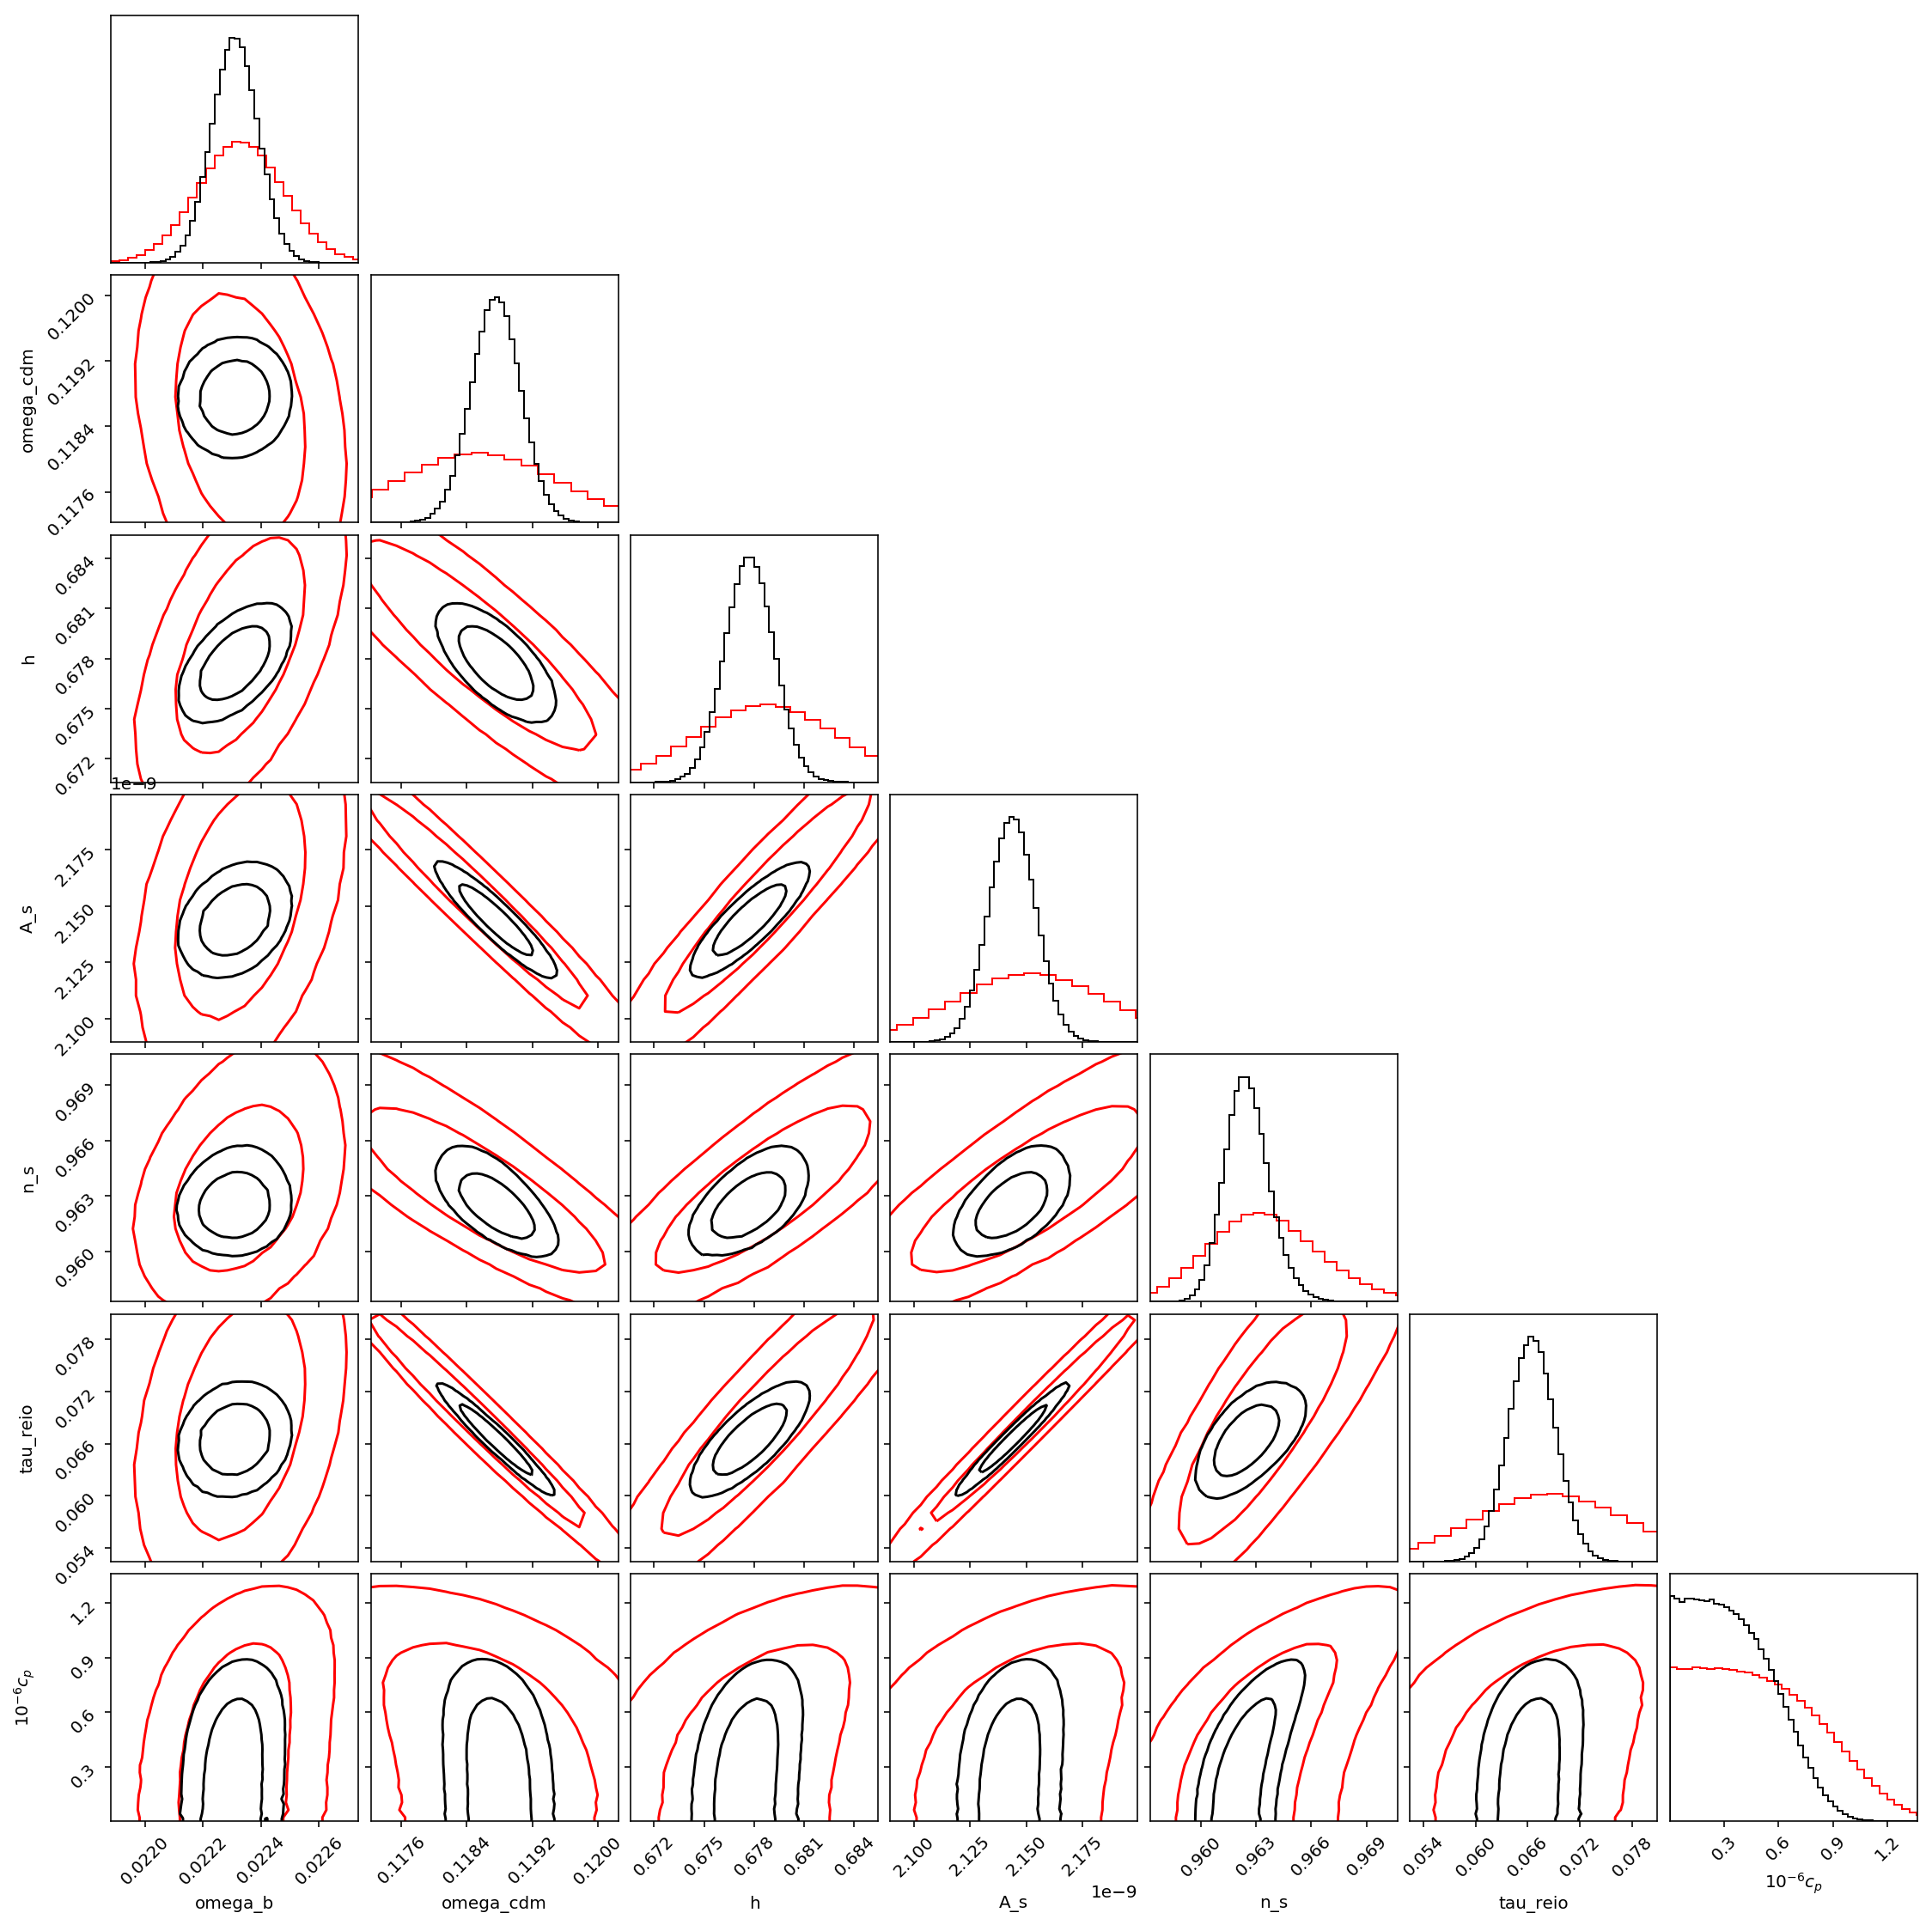

In [23]:
samps_linear = get_samps(cov_linear, centers, num=int(1e8)) # get the samples from the covariance
samps_linear = samps_linear[samps_linear.T[-1]>0] # sigma_p cannot be negative
modified_linear = samps_linear.copy()
modified_linear.T[-1] = convert_to_cc_array(modified_linear.T[-1], 1.0) * 1e-6 # convert to 1e6 * cc
    
fig = corner.corner(modified,
              plot_datapoints=False, plot_density=False, bins=50,  
              weights=1./np.sqrt(samps.T[-1]),
              levels=(0.68,0.95),lw=2, color='red', labels=[r'omega_b', r'omega_cdm', r'h',  r'A_s', r'n_s', r'tau_reio', r'$10^{-6}c_{p}$'], 
              hist_kwargs={'normed':True});
corner.corner(modified_linear,
              plot_datapoints=False, plot_density=False, bins=50,  
              weights=1./np.sqrt(samps_linear.T[-1]),
              levels=(0.68,0.95),lw=2, color='black', labels=[r'omega_b', r'omega_cdm', r'h',  r'A_s', r'n_s', r'tau_reio', r'$10^{-6}c_{p}$'], 
              hist_kwargs={'normed':True}, fig = fig);
plt.savefig("ff_pt_linear.pdf")

In [38]:
linear = experiments.get_PlanckPol_combine()
fisher_linear = linear[0].get_fisher_changed(fiducial_linear, pars, cl_right_linear, cl_left_linear, steps) + linear[1].get_fisher_changed(fiducial_linear, pars, cl_right_linear, cl_left_linear, steps)+ linear[2].get_fisher_changed(fiducial_linear, pars, cl_right_linear, cl_left_linear, steps)
cov_linear = np.linalg.inv(fisher_linear)
unmodified_samples_linear = get_samps(cov_linear, centers)

fisher = linear[0].get_fisher_changed(fiducial, pars, cl_right, cl_left, steps) + linear[1].get_fisher_changed(fiducial, pars, cl_right, cl_left, steps)+ linear[2].get_fisher_changed(fiducial, pars, cl_right, cl_left, steps)
cov = np.linalg.inv(fisher)
unmodified_samples = get_samps(cov, centers)
samps = get_samps(cov, centers, num=int(1e8)) # get the samples from the covariance
samps = samps[samps.T[-1]>0] # sigma_p cannot be negative
modified = samps.copy()
modified.T[-1] = convert_to_cc_array(modified.T[-1], 1.0) * 1e-6 # convert to 1e6 * cc

/usr/licensed/anaconda3/5.2.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


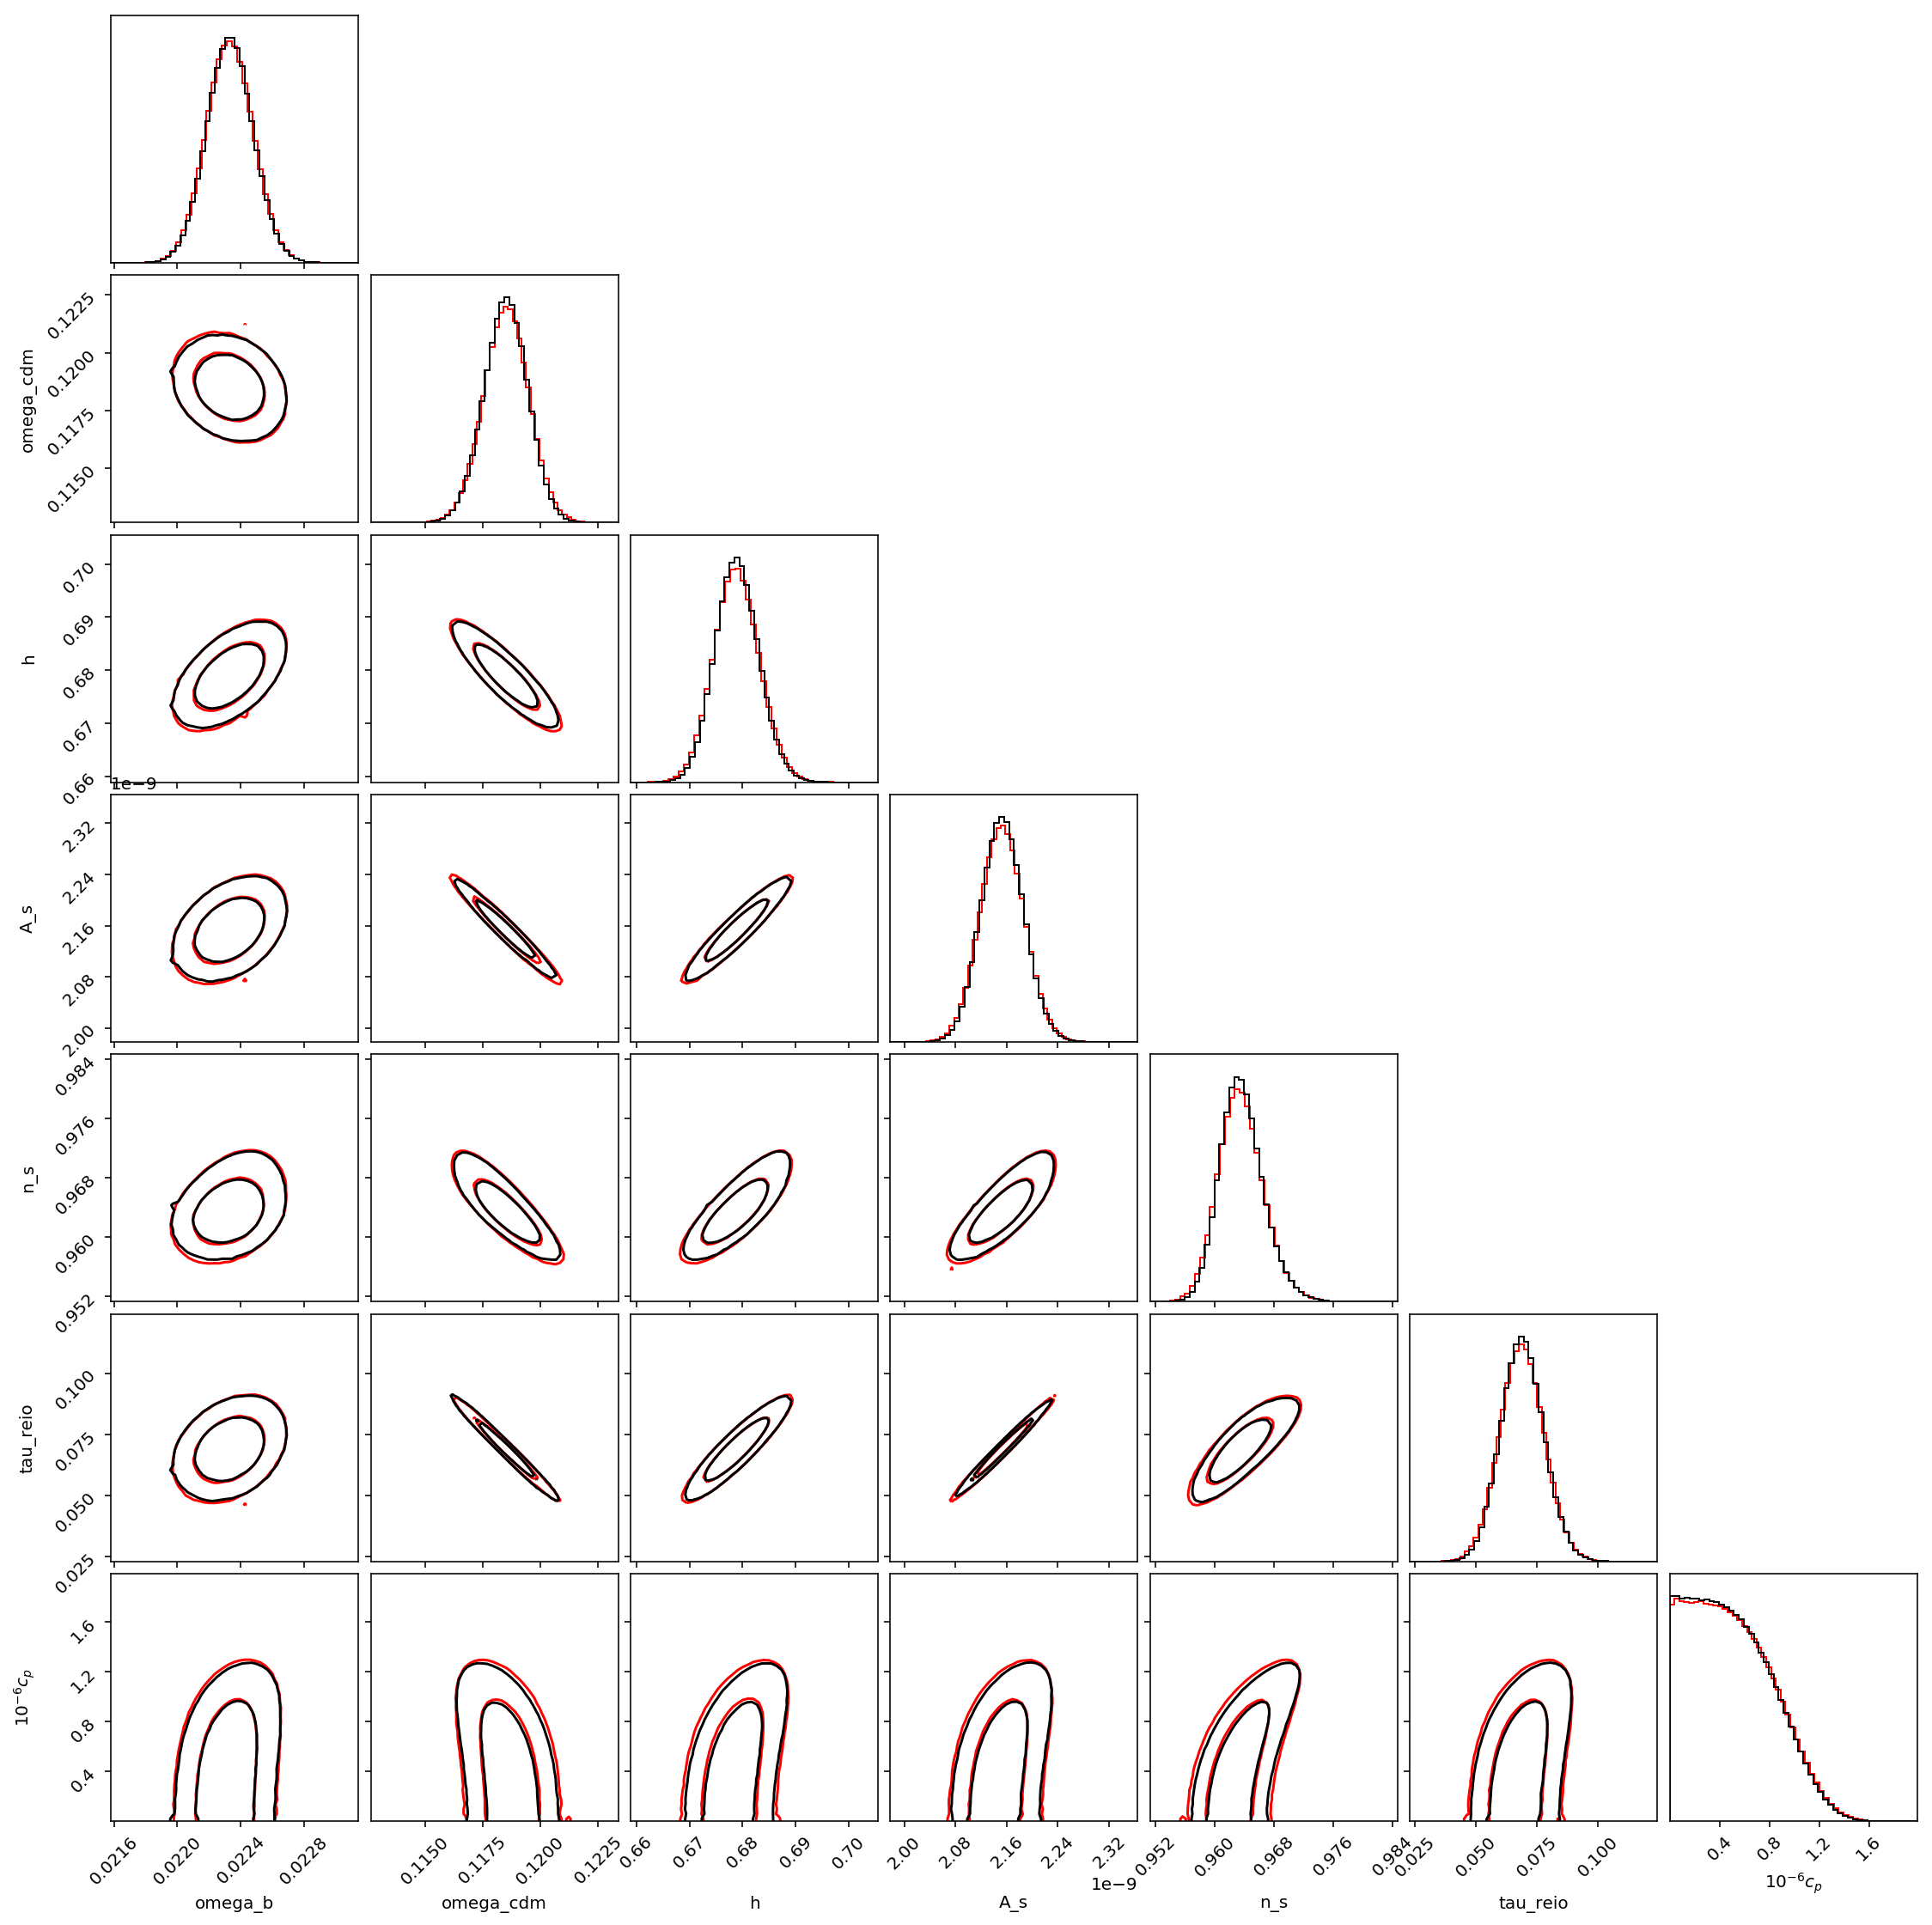

In [40]:
samps_linear = get_samps(cov_linear, centers, num=int(1e8)) # get the samples from the covariance
samps_linear = samps_linear[samps_linear.T[-1]>0] # sigma_p cannot be negative
modified_linear = samps_linear.copy()
modified_linear.T[-1] = convert_to_cc_array(modified_linear.T[-1], 1.0) * 1e-6 # convert to 1e6 * cc
    
fig = corner.corner(modified,
              plot_datapoints=False, plot_density=False, bins=50,  
              weights=1./np.sqrt(samps.T[-1]),
              levels=(0.68,0.95),lw=2, color='red', labels=[r'omega_b', r'omega_cdm', r'h',  r'A_s', r'n_s', r'tau_reio', r'$10^{-6}c_{p}$'], 
              hist_kwargs={'normed':True});
corner.corner(modified_linear,
              plot_datapoints=False, plot_density=False, bins=50,  
              weights=1./np.sqrt(samps_linear.T[-1]),
              levels=(0.68,0.95),lw=2, color='black', labels=[r'omega_b', r'omega_cdm', r'h',  r'A_s', r'n_s', r'tau_reio', r'$10^{-6}c_{p}$'], 
              hist_kwargs={'normed':True}, fig = fig);    
plt.savefig("ff_pt_linear.pdf")

In [46]:
CMB_S4 = experiments.get_S4_changed()
fisher_linear_S4 = fisher_linear + CMB_S4[0].get_fisher_changed(fiducial_linear, pars, cl_right_linear, cl_left_linear, steps) + CMB_S4[1].get_fisher_changed(fiducial_linear, pars, cl_right_linear, cl_left_linear, steps)
cov_linear_S4 = np.linalg.inv(fisher_linear_S4)
unmodified_samples_linear_S4 = get_samps(cov_linear_S4, centers)
samps_linear_S4 = get_samps(cov_linear_S4, centers, num=int(1e8)) # get the samples from the covariance
samps_linear_S4 = samps_linear_S4[samps_linear_S4.T[-1]>0] # sigma_p cannot be negative
modified_linear_S4 = samps_linear_S4.copy()
modified_linear_S4.T[-1] = convert_to_cc_array(modified_linear_S4.T[-1], 1.0) * 1e-6 # convert to 1e6 * cc

fisher_S4 = fisher + CMB_S4[0].get_fisher_changed(fiducial, pars, cl_right, cl_left, steps) + CMB_S4[1].get_fisher_changed(fiducial, pars, cl_right, cl_left, steps)
cov_S4 = np.linalg.inv(fisher_S4)
cov_S4 = np.linalg.inv(fisher_S4)
unmodified_samples_S4 = get_samps(cov_S4, centers)
samps_S4 = get_samps(cov_S4, centers, num=int(1e8)) # get the samples from the covariance
samps_S4 = samps_S4[samps_S4.T[-1]>0] # sigma_p cannot be negative
modified_S4 = samps_S4.copy()
modified_S4.T[-1] = convert_to_cc_array(modified_S4.T[-1], 1.0) * 1e-6 # convert to 1e6 * cc

/usr/licensed/anaconda3/5.2.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


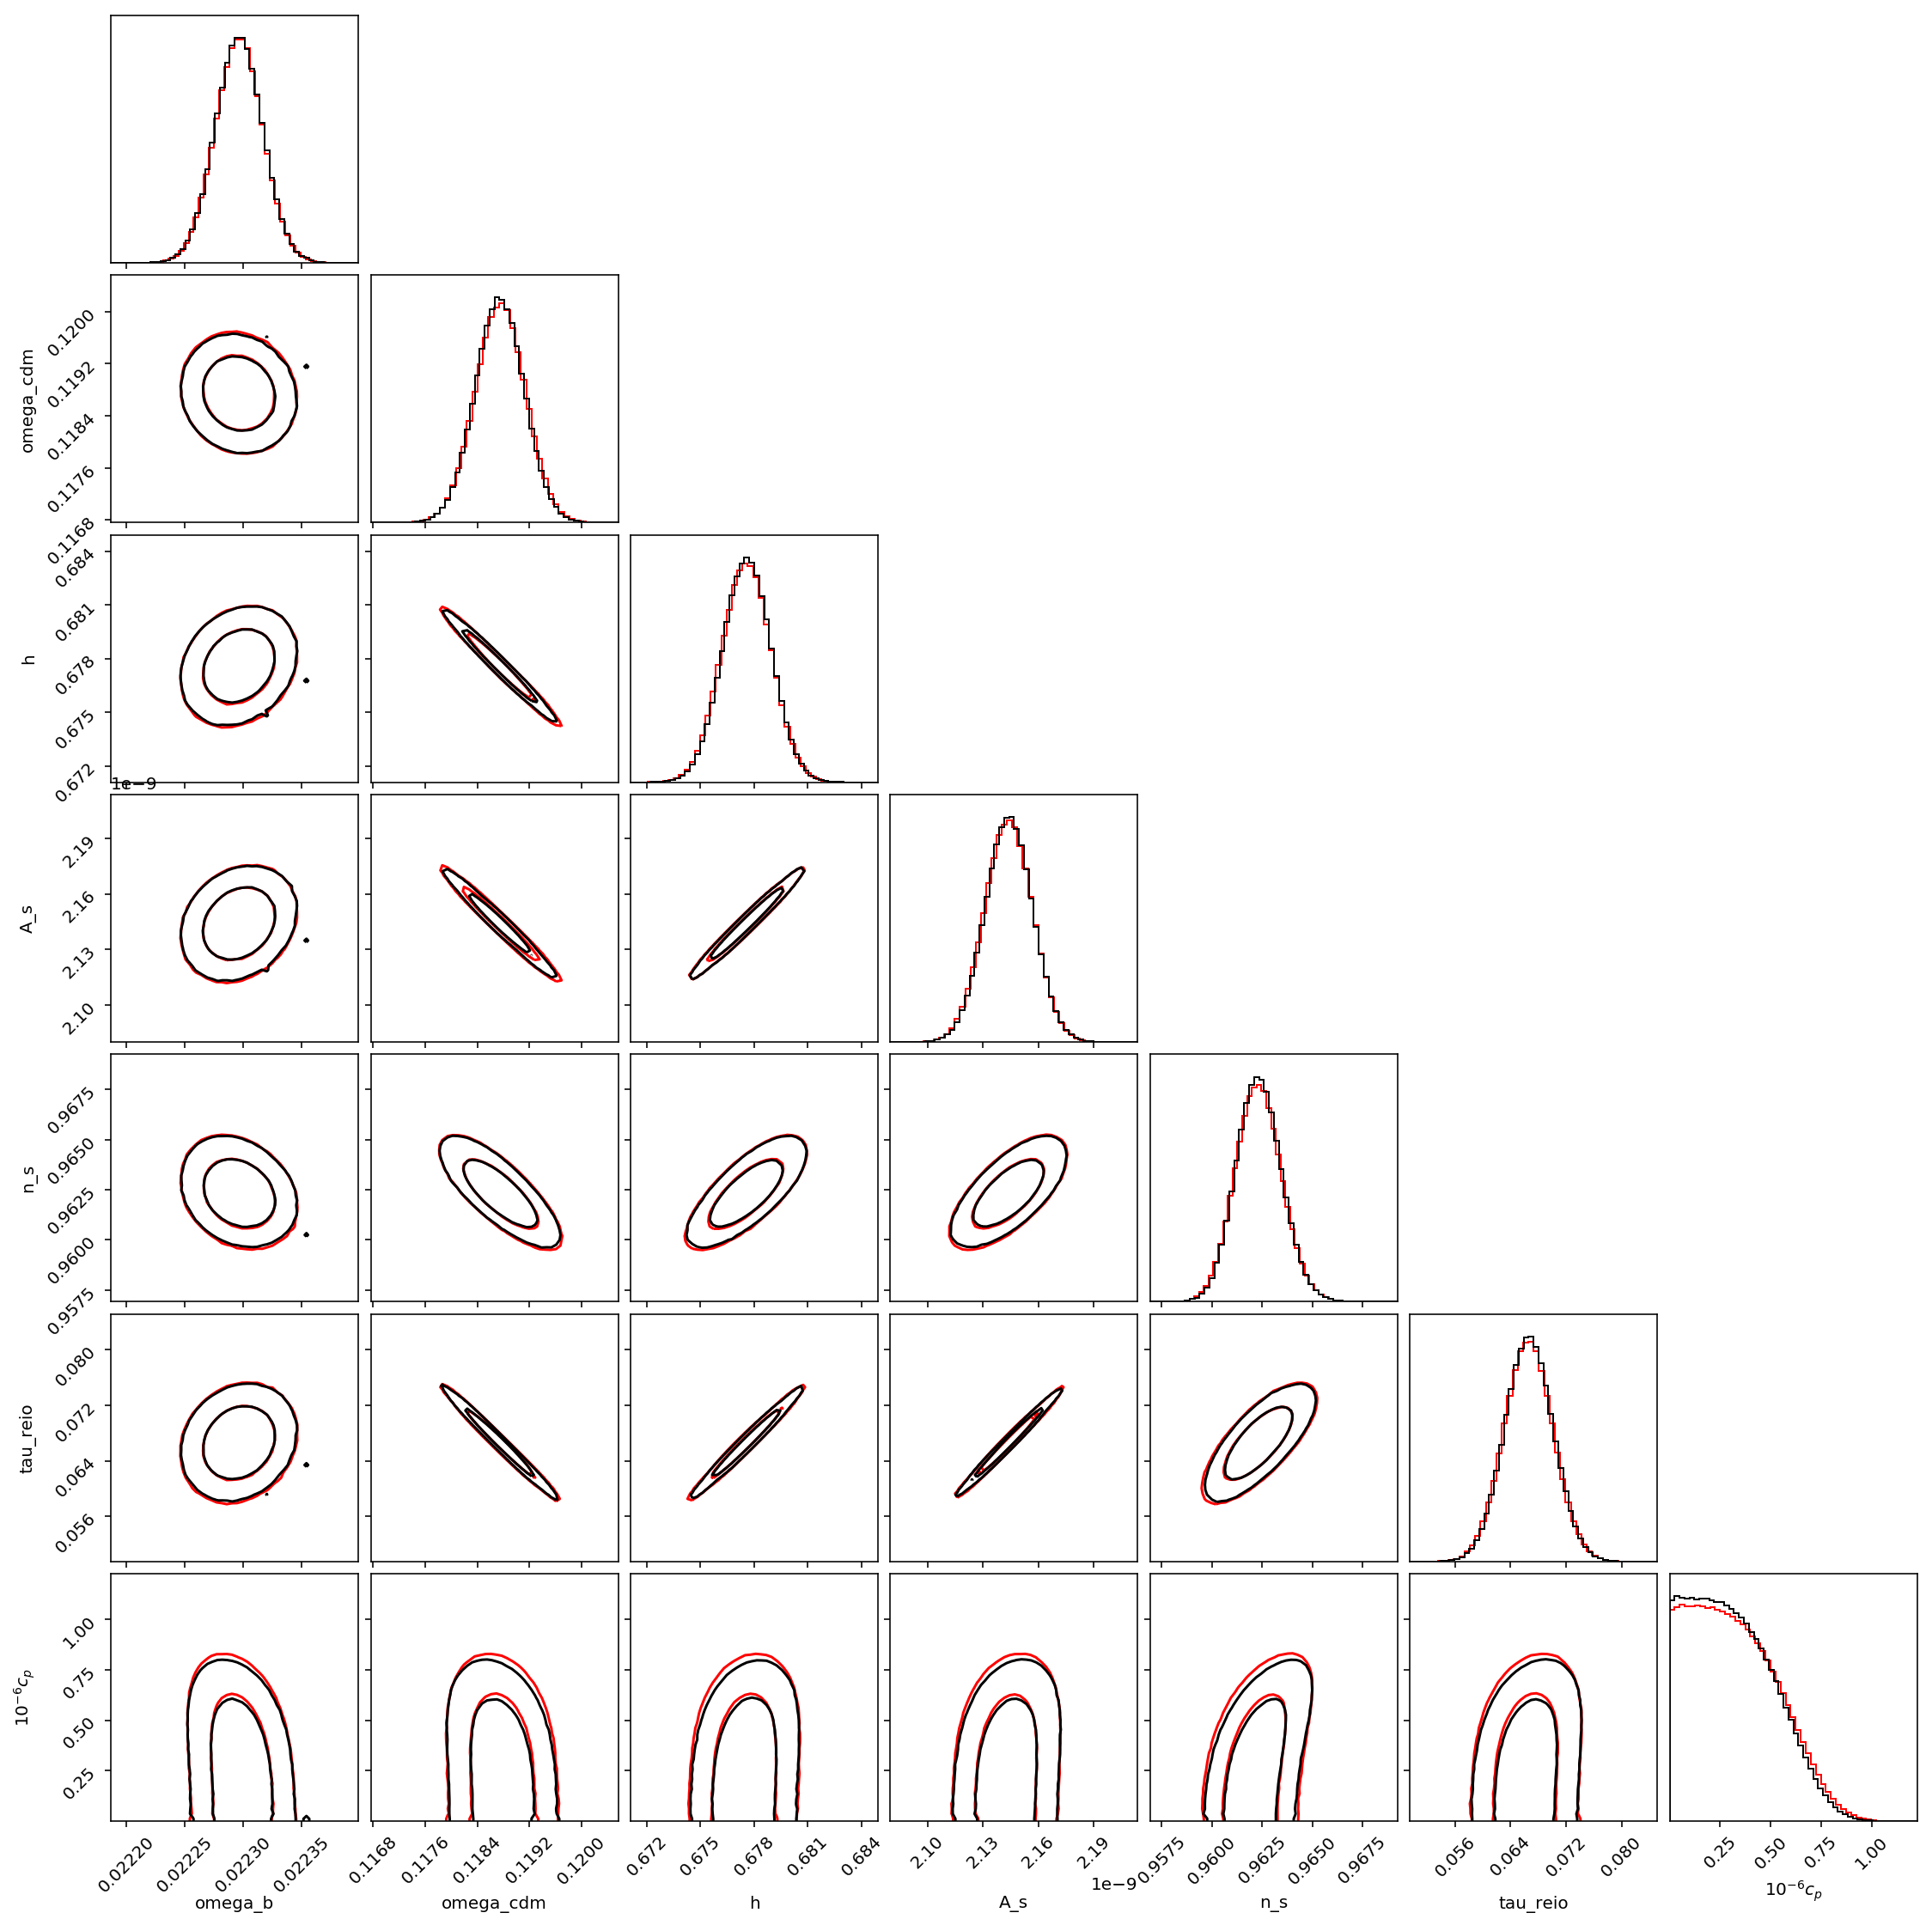

In [47]:
fig = corner.corner(modified_S4,
              plot_datapoints=False, plot_density=False, bins=50,  
              weights=1./np.sqrt(samps_S4.T[-1]),
              levels=(0.68,0.95),lw=2, color='red', labels=[r'omega_b', r'omega_cdm', r'h',  r'A_s', r'n_s', r'tau_reio', r'$10^{-6}c_{p}$'], 
              hist_kwargs={'normed':True});
corner.corner(modified_linear_S4,
              plot_datapoints=False, plot_density=False, bins=50,  
              weights=1./np.sqrt(samps_linear_S4.T[-1]),
              levels=(0.68,0.95),lw=2, color='black', labels=[r'omega_b', r'omega_cdm', r'h',  r'A_s', r'n_s', r'tau_reio', r'$10^{-6}c_{p}$'], 
              hist_kwargs={'normed':True}, fig = fig);    

In [31]:
ll = dmeff['ell']
clPP_lcdm = fiducial['pp']
clTT_lcdm = fiducial['tt']
clEE_lcdm = fiducial['ee']
clPP_dmeff = dmeff['pp']
clTT_dmeff = dmeff['tt']
clEE_dmeff = dmeff['ee']
clPP_lcdm_linear = fiducial_linear['pp']
clEE_lcdm_linear = fiducial_linear['ee']
clTT_lcdm_linear = fiducial_linear['tt']
clPP_dmeff_linear = dmeff_linear['pp']
clTT_dmeff_linear = dmeff_linear['tt']
clEE_dmeff_linear = dmeff_linear['ee']


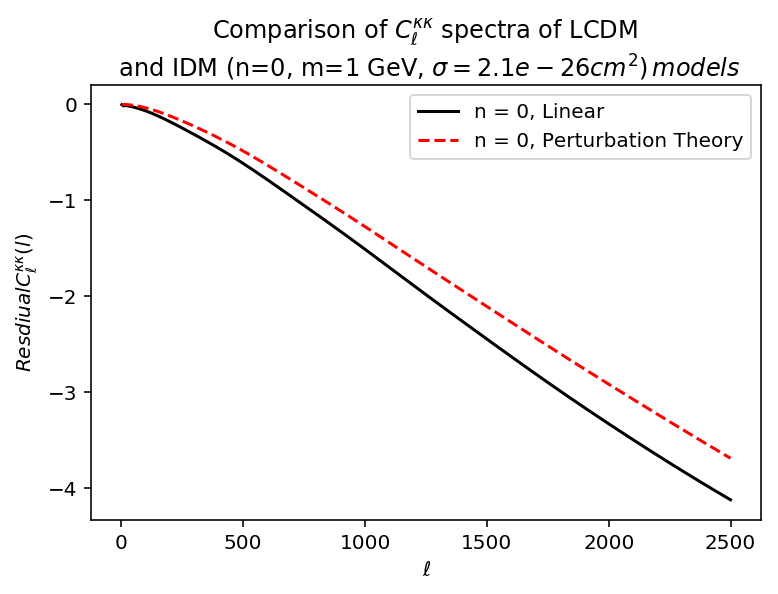

<Figure size 432x288 with 0 Axes>

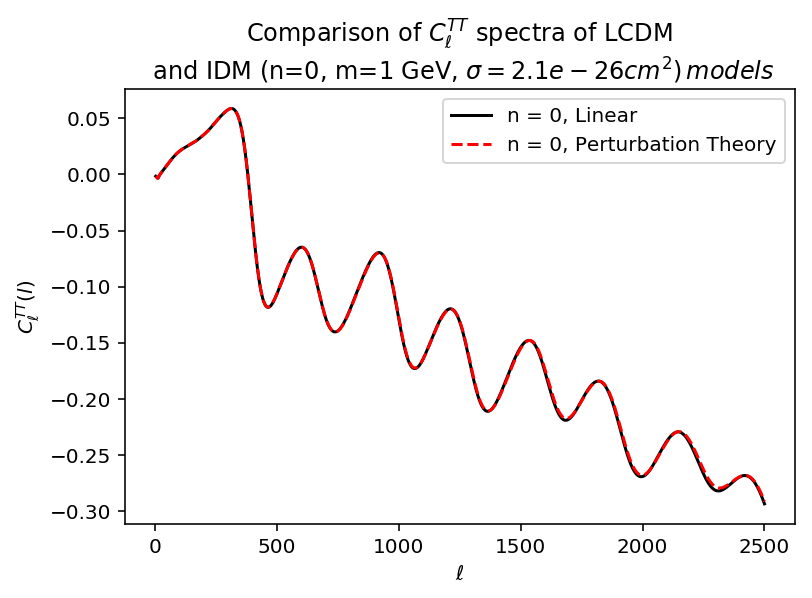

<Figure size 432x288 with 0 Axes>

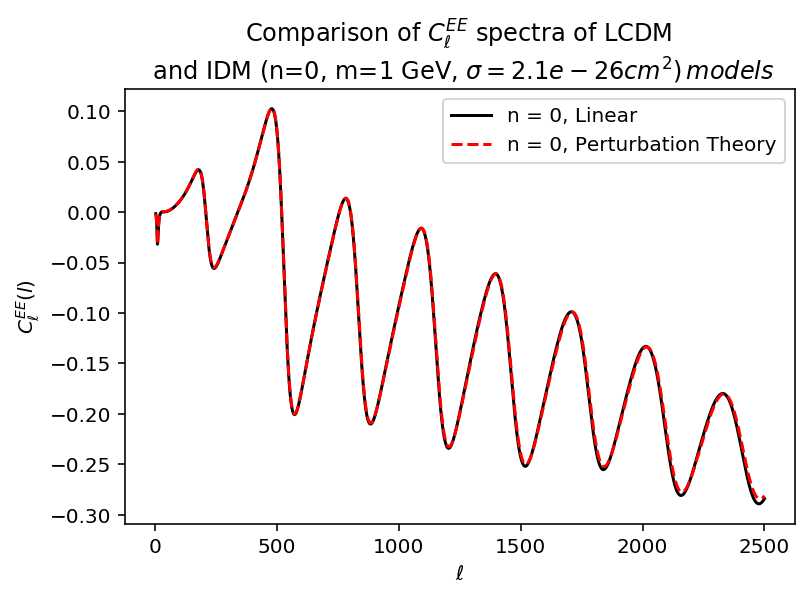

<Figure size 432x288 with 0 Axes>

In [34]:
plt.figure()
plt.xscale('linear');plt.yscale('linear');#plt.xlim(0, 1000); plt.ylim(5.e-9, 4.e-7)
plt.xlabel(r'${\ell}$')
plt.ylabel(r'$Resdiual C_{\ell} ^{\kappa\kappa}(l) $')

plt.plot(ll, 100*(clPP_dmeff_linear- clPP_lcdm_linear)/clPP_lcdm_linear, 'k-',label = "n = 0, Linear")
plt.plot(ll, 100*(clPP_dmeff - clPP_lcdm)/clPP_lcdm,'r--', label = 'n = 0, Perturbation Theory')

plt.legend(loc = "upper right")
plt.title("Comparison of " + r'$C_{\ell} ^{\kappa\kappa}$'+ " spectra of LCDM \n " + 'and IDM (n=0, m=1 GeV, ' +r'${\sigma}=2.1e-26 cm^2)\, models$')
plt.show()
plt.savefig("comparison_Cl(kappa|kappa)_n=0.pdf")

plt.figure()
plt.xscale('linear');plt.yscale('linear');#plt.xlim(0, 1000); plt.ylim(5.e-9, 4.e-7)
plt.xlabel(r'${\ell}$')
plt.ylabel(r'$C_{\ell} ^{TT}(l) $')

plt.plot(ll, 100*(clTT_dmeff_linear- clTT_lcdm_linear)/clTT_lcdm_linear, 'k-',label = "n = 0, Linear")
plt.plot(ll, 100*(clTT_dmeff - clTT_lcdm)/clTT_lcdm,'r--', label = 'n = 0, Perturbation Theory')

plt.legend(loc = "upper right")
plt.title("Comparison of " + r'$C_{\ell} ^{TT}$'+ " spectra of LCDM \n " + 'and IDM (n=0, m=1 GeV, ' +r'${\sigma}=2.1e-26 cm^2)\, models$')
plt.show()
plt.savefig("comparison_Cl(TT)_n=0.pdf")

plt.figure()
plt.xscale('linear');plt.yscale('linear');#plt.xlim(0, 1000); plt.ylim(5.e-9, 4.e-7)
plt.xlabel(r'${\ell}$')
plt.ylabel(r'$C_{\ell} ^{EE}(l) $')

plt.plot(ll, 100*(clEE_dmeff_linear- clEE_lcdm_linear)/clEE_lcdm_linear, 'k-',label = "n = 0, Linear")
plt.plot(ll, 100*(clEE_dmeff - clEE_lcdm)/clEE_lcdm,'r--', label = 'n = 0, Perturbation Theory')

plt.legend(loc = "upper right")
plt.title("Comparison of " + r'$C_{\ell} ^{EE}$'+ " spectra of LCDM \n " + 'and IDM (n=0, m=1 GeV, ' +r'${\sigma}=2.1e-26 cm^2)\, models$')
plt.show()
plt.savefig("comparison_Cl(EE)_n=0.pdf")